In [1]:
from tifffile import imread
from matplotlib import pyplot as plt
import os
import numpy as np
from skimage.measure import find_contours

In [4]:
fpath = '/stanley/WangLab/Data/Processed/2022-10-15-Rena-SkinCulture254-gene/output/2022-12-08-2D-segmentation-unstitched-tiles'
tile_num = [21, 22, 32, 83, 84, 93, 155, 164, 219, 227, 238, 299, 300, 308]

In [6]:
def tile3digits(num_str):
    '''input: string-form integer
        output: same but 3 digits'''
    if len(num_str) == 1:
        return '00'+num_str
    elif len(num_str) == 2:
        return '0'+num_str
    else: return num_str

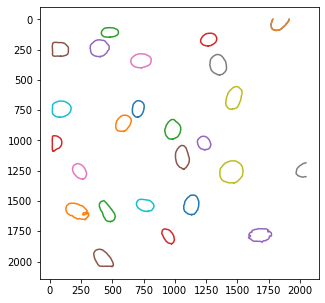

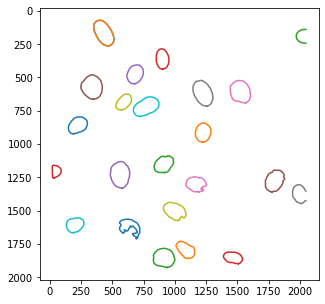

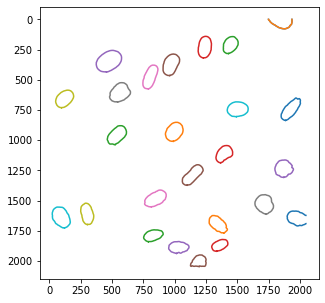

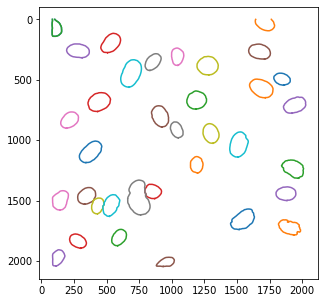

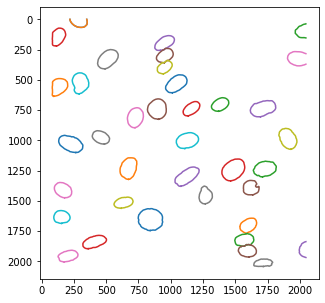

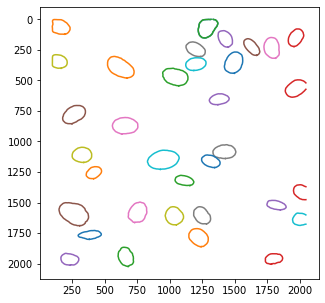

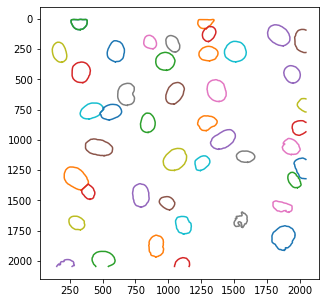

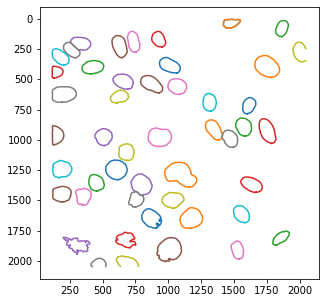

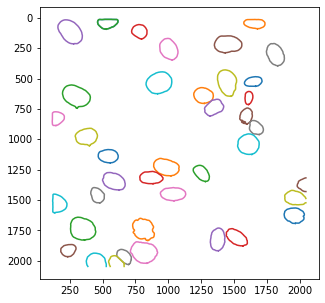

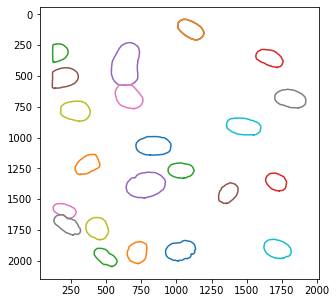

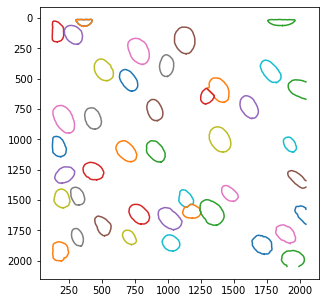

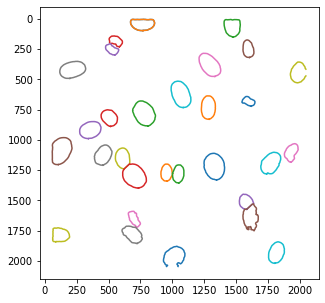

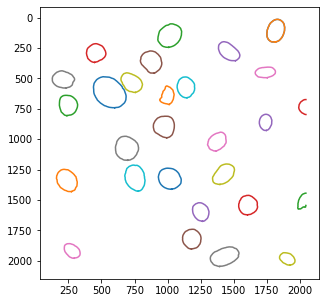

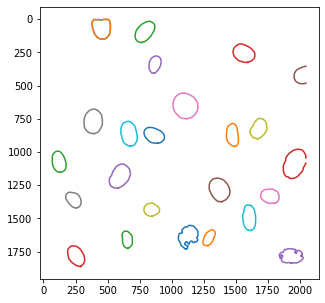

In [9]:
for tile in tile_num:
    tile_ = tile3digits(str(tile))
    nucl_seg = imread(os.path.join(fpath, '2022-12-08-2D-segmentation', 'nuclei', f'Position{tile_}.tiff'))
    # nucleus contours
    nucl_contours = []
    for nucl in range(np.amax(nucl_seg)+1):
        a = find_contours(nucl_seg == nucl)
        if len(a):
            nucl_contours.append(a[0])
    fig = plt.figure(figsize=(5,5))
    for i, ct in enumerate(nucl_contours):
        plt.plot(ct[:,1], ct[:,0])
    plt.gca().invert_yaxis()
    # break
    plt.savefig(os.path.join(fpath, f'Position{tile_}_dapiContour.pdf'))

### test

In [10]:
import cv2
im = cv2.imread(os.path.join(fpath, 'iPSC_124_6h.tiff'))

In [11]:
im.shape

(2048, 2048, 3)

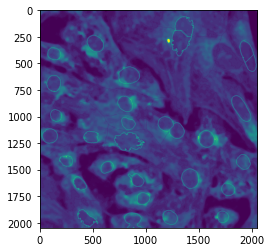

In [12]:
plt.imshow(im[:,:,0])

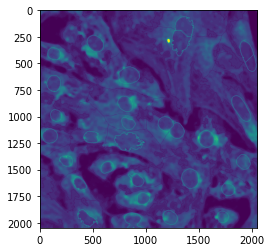

In [7]:
plt.imshow(im[:,:,1])

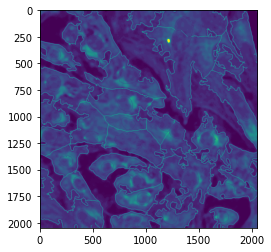

In [14]:
plt.imshow(im[:,:,2])
plt.savefig(os.path.join(fpath, 'iPSC-skin-contour', 'iPSC_124_6h_flamingo.pdf'))